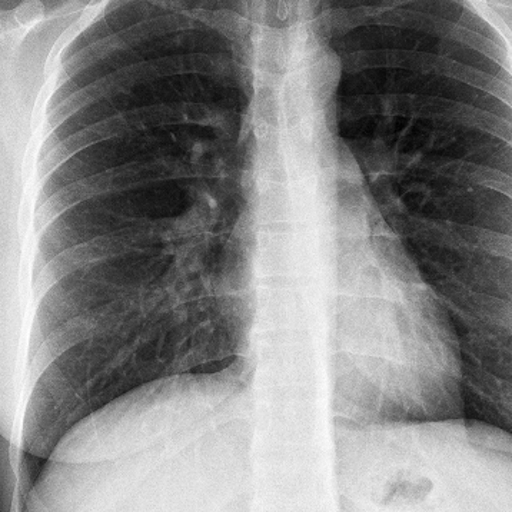

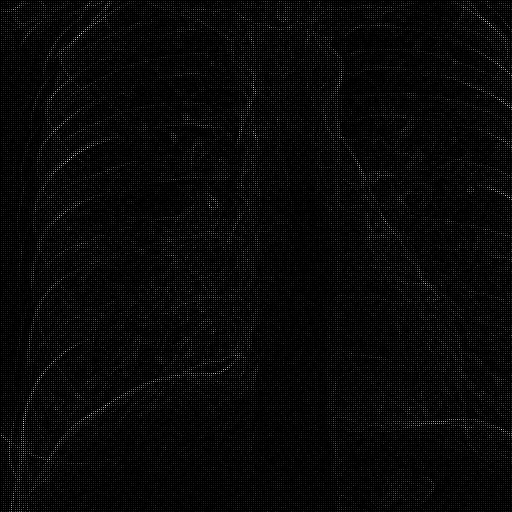

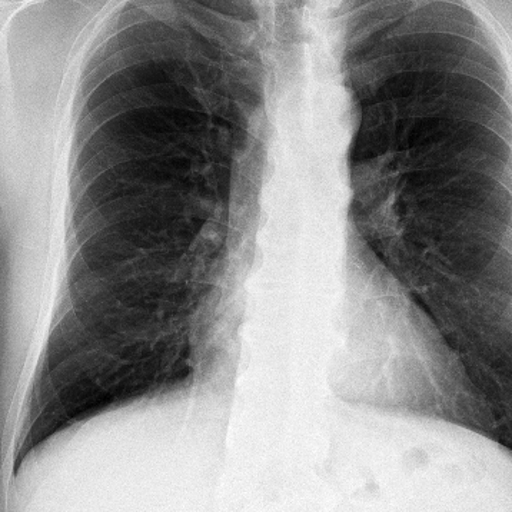

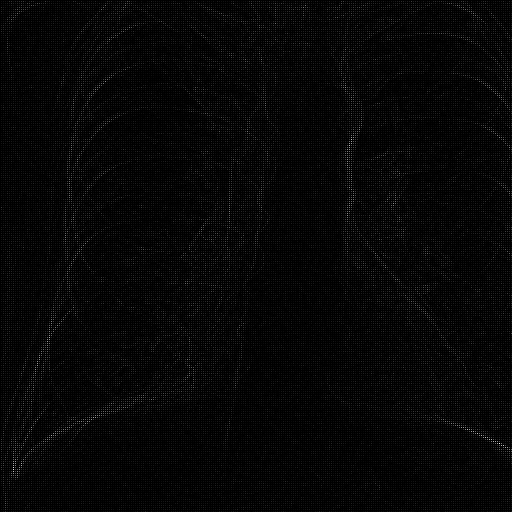

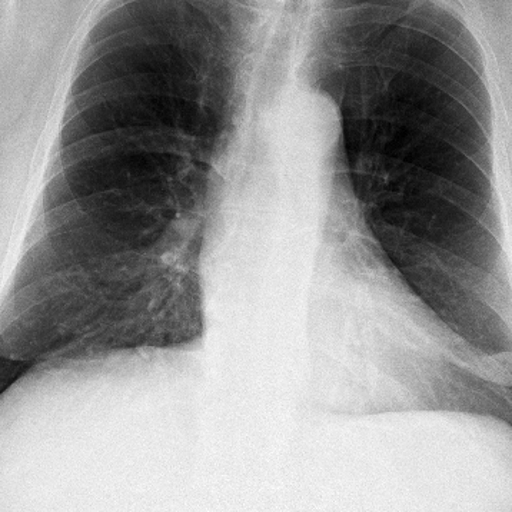

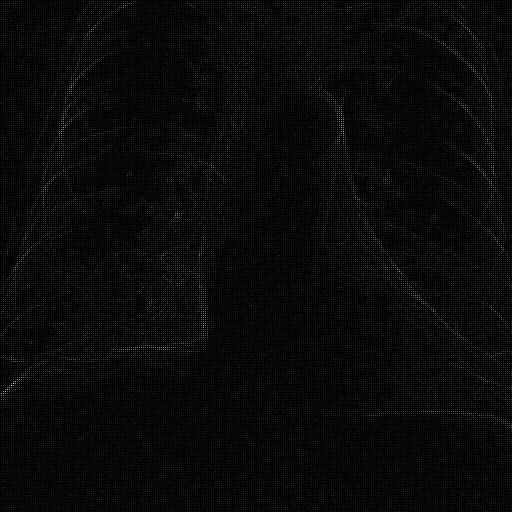

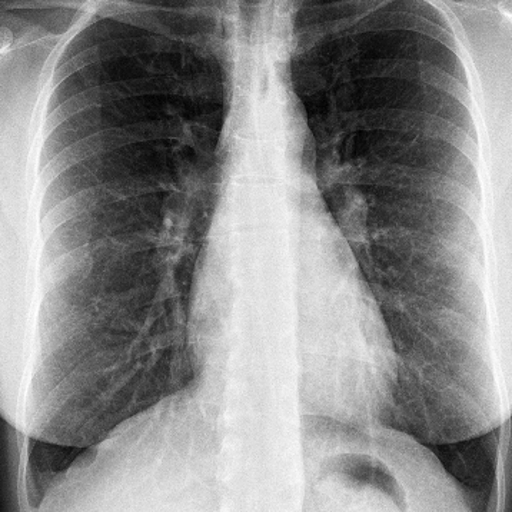

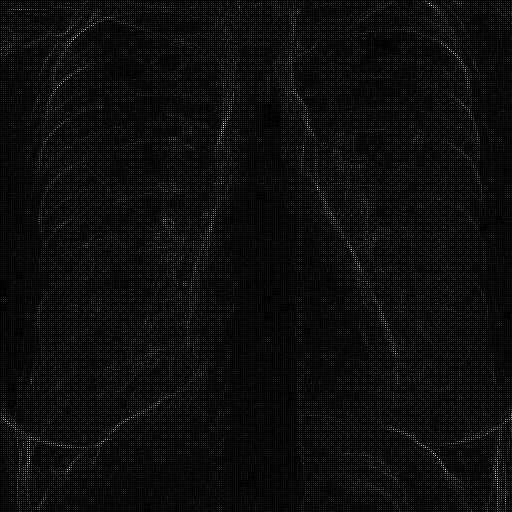

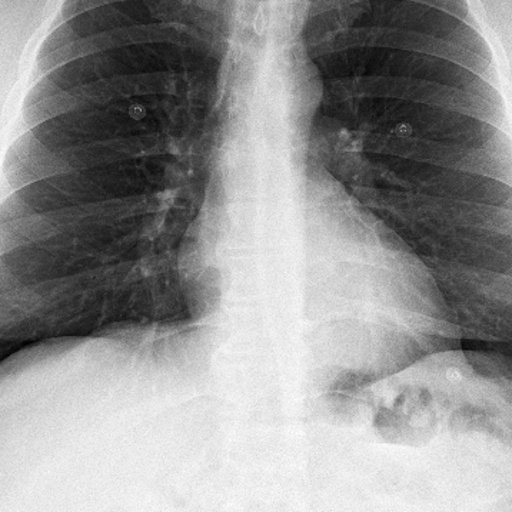

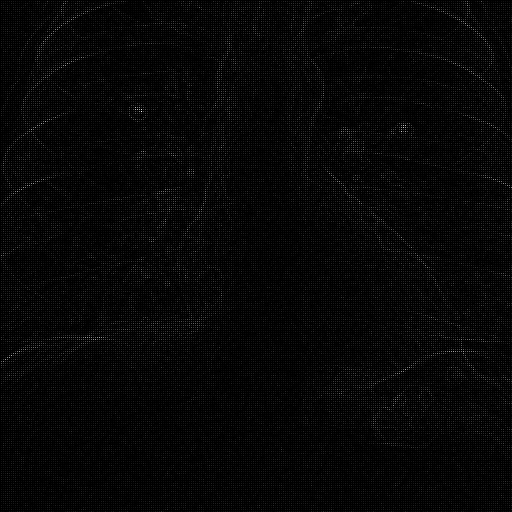

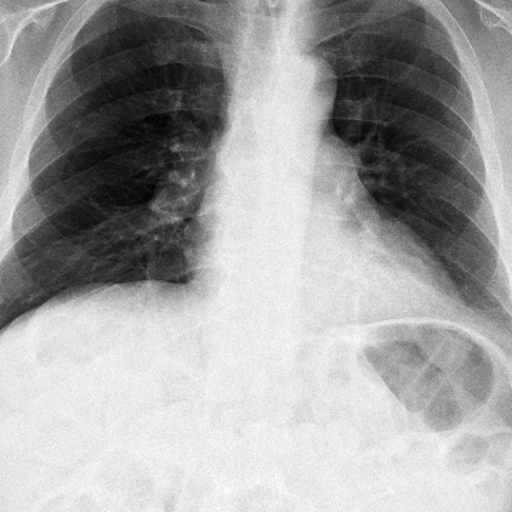

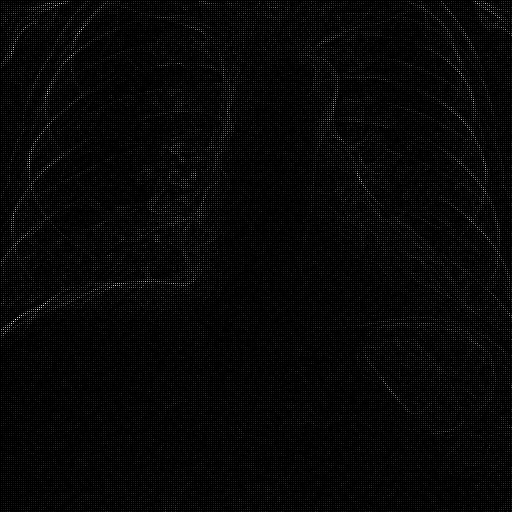

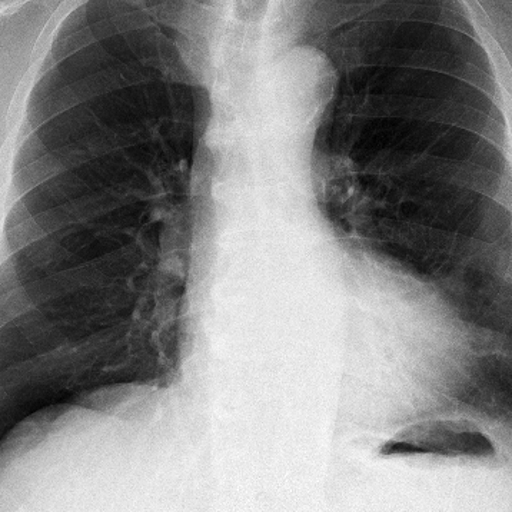

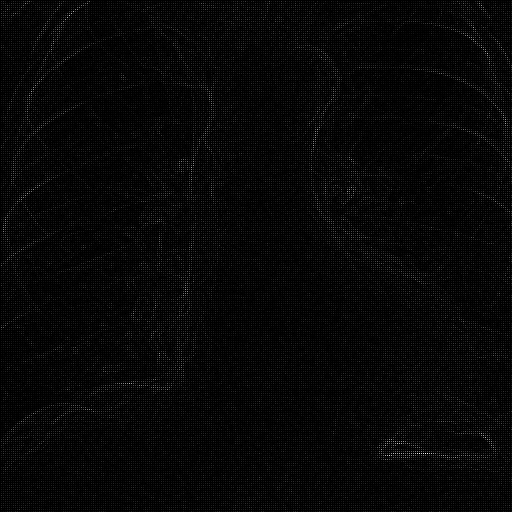

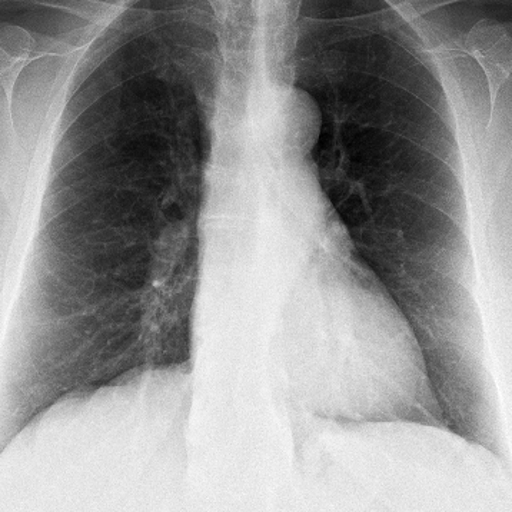

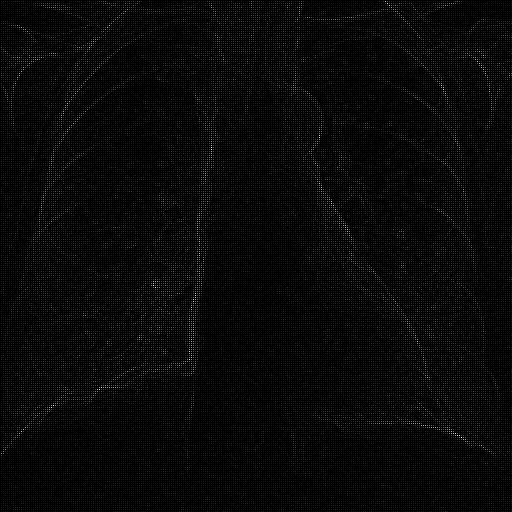

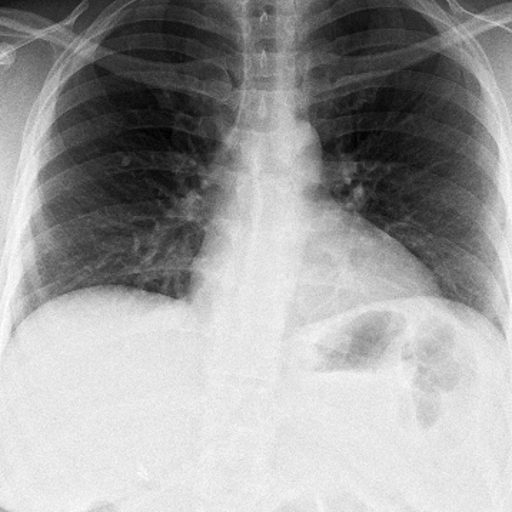

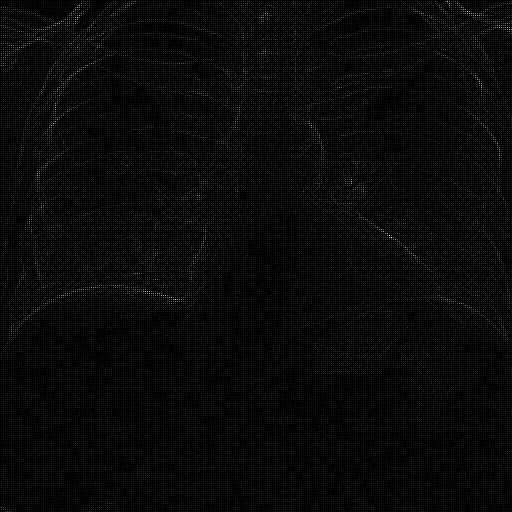

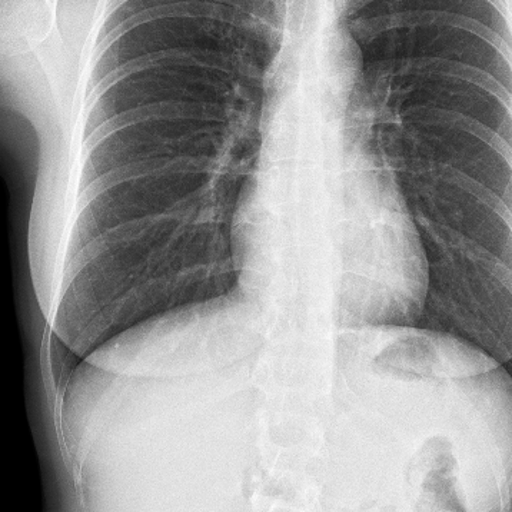

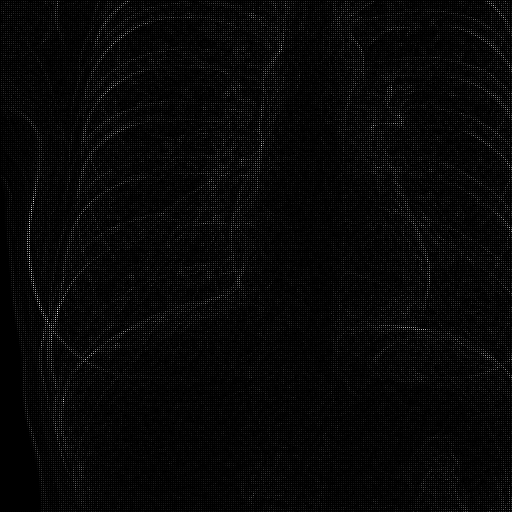

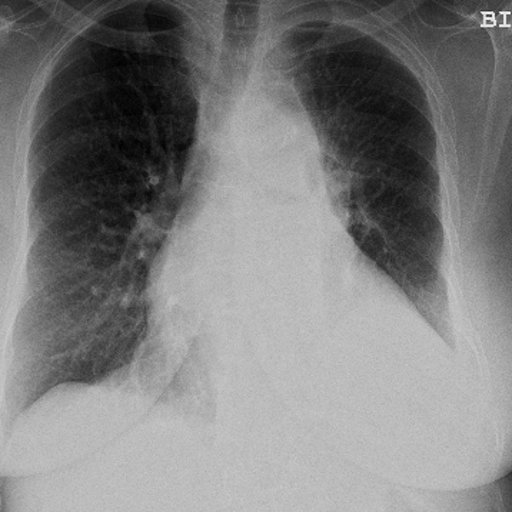

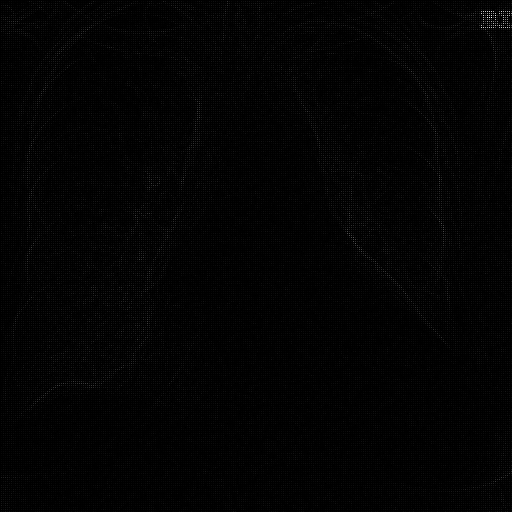

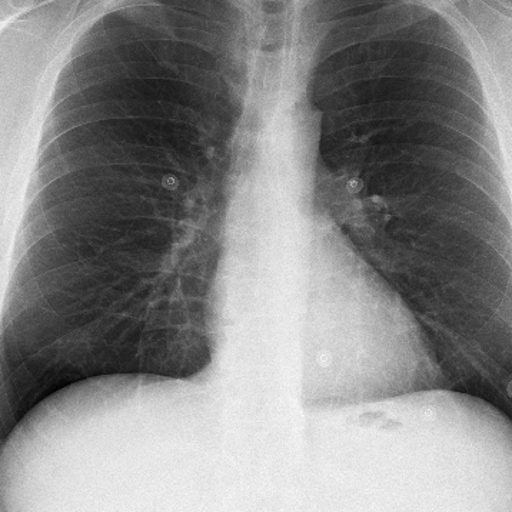

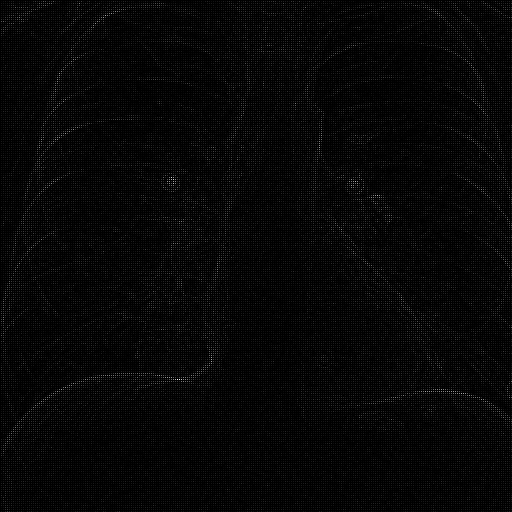

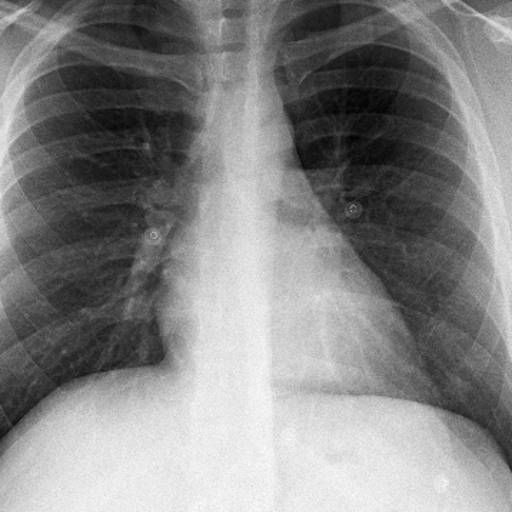

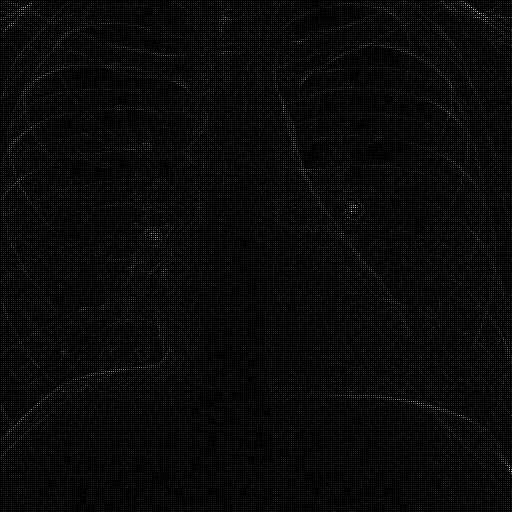

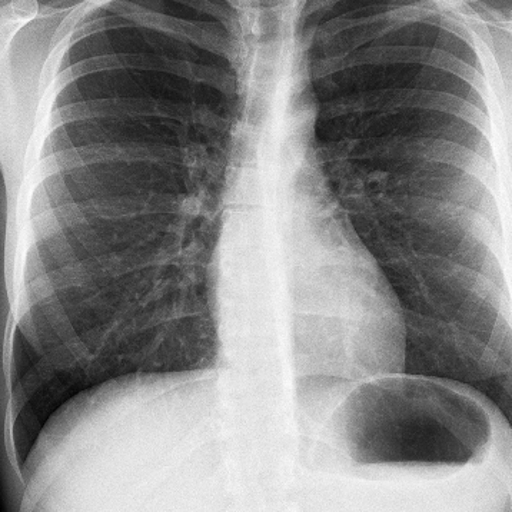

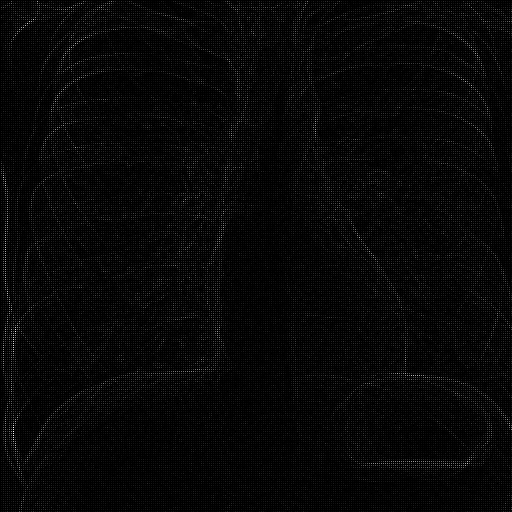

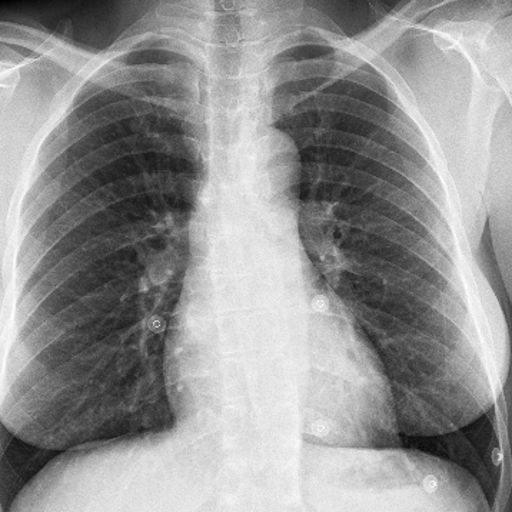

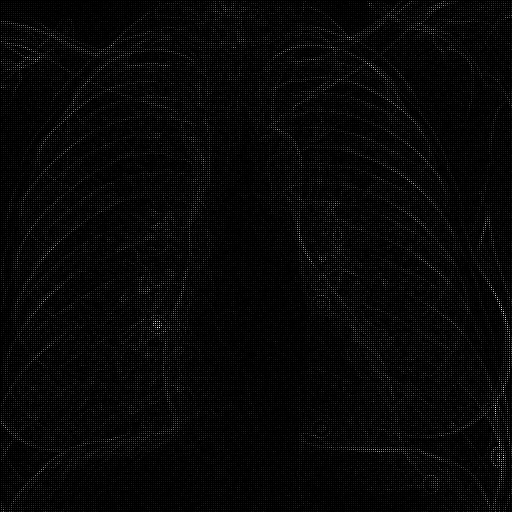

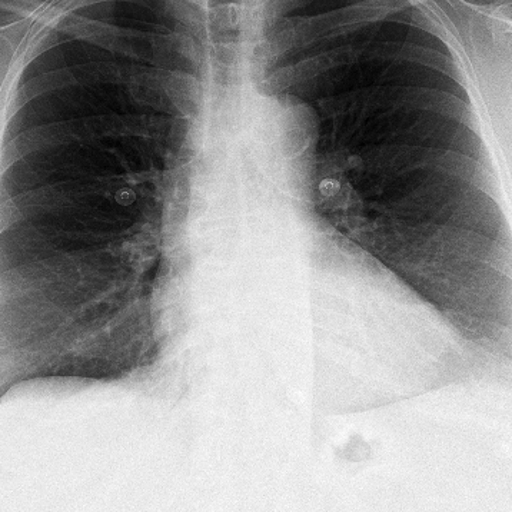

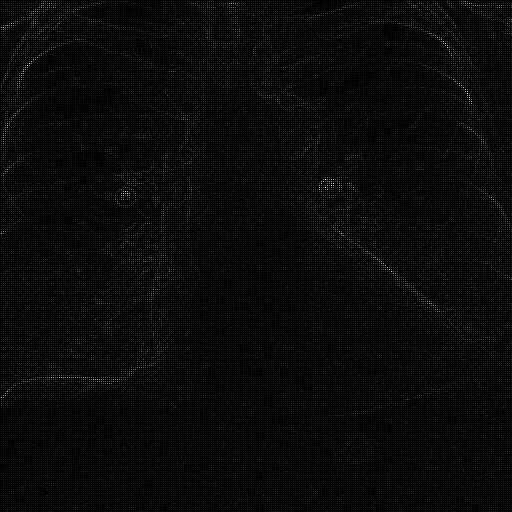

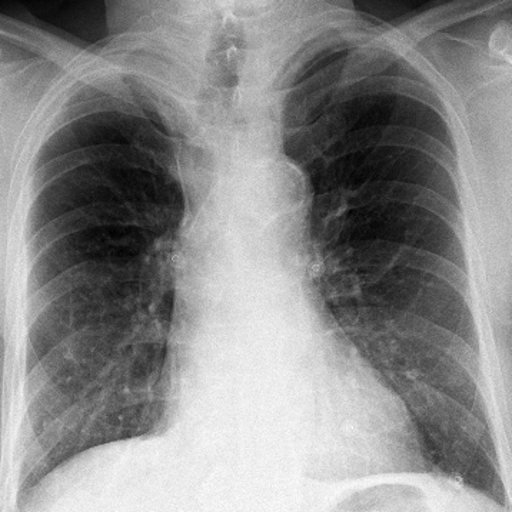

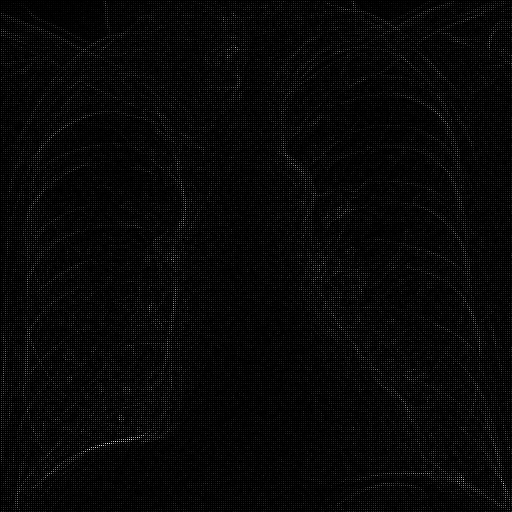

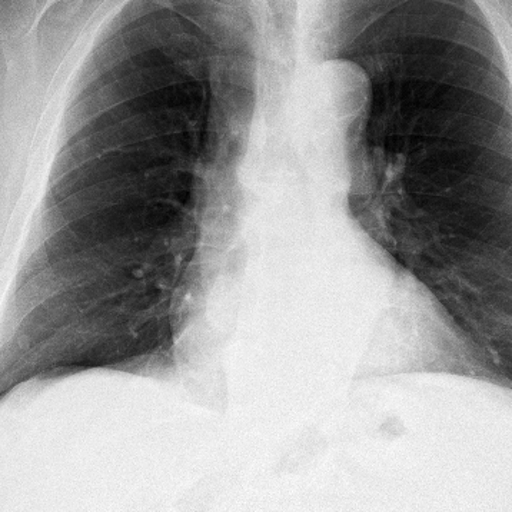

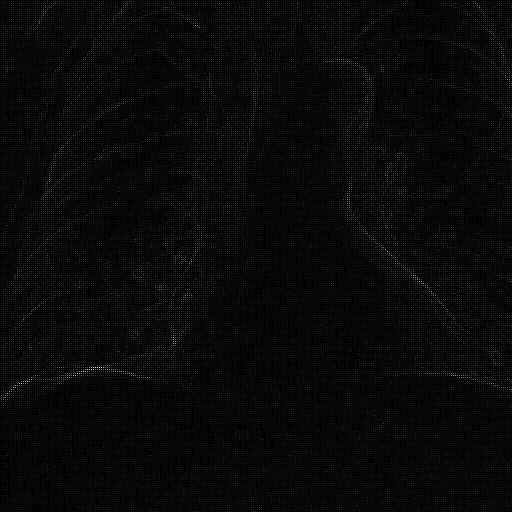

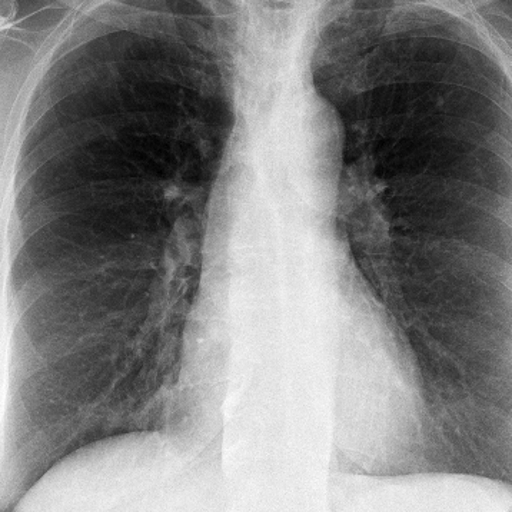

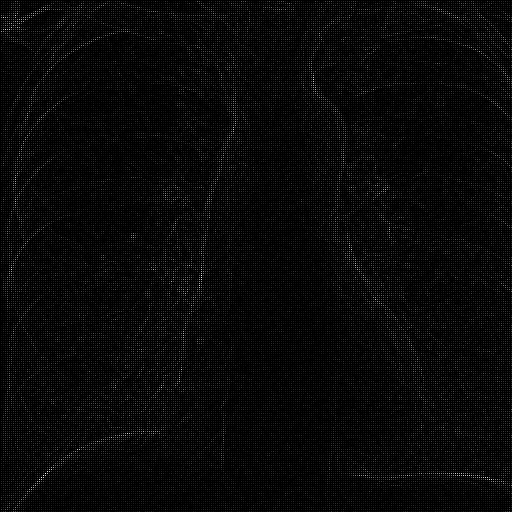

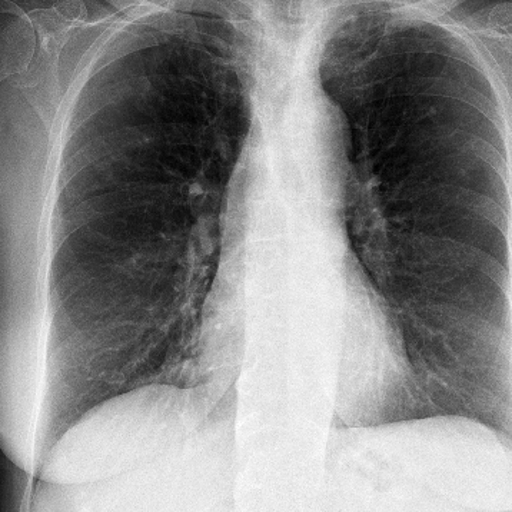

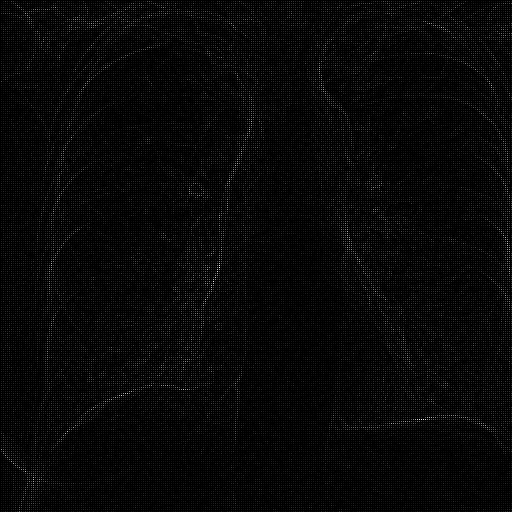

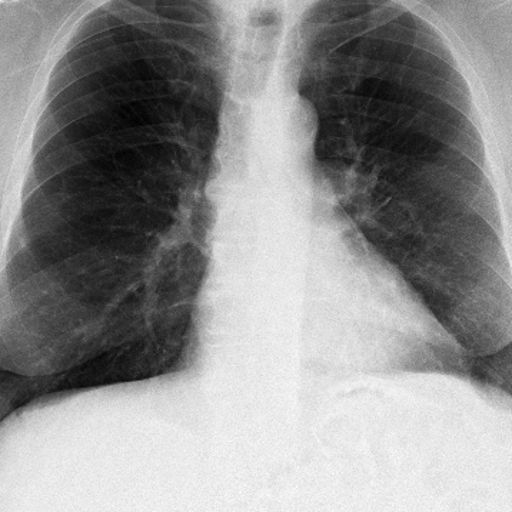

KeyboardInterrupt: 

In [2]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from skimage.feature import hog
import cv2
# settings for LBP

orientations=6
pixels_per_cell=[2]
cells_per_block=1

def normalize(image):
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    
    image[image>1] = 1. #quitar información
    image[image<0] = 0.
    return image

def cut_image_resize(pixel_array_windowed, c_path, pixels_per_cell, image_size=512, p=0.15):
    #n_size, m_size = pixel_array_windowed.shape
    n_size, m_size = pixel_array_windowed.size
    
    #CUT
    pixel_array_windowed = pixel_array_windowed.crop((int(np.round(m_size*p)), int(np.round(n_size*p)), m_size-int(np.round(m_size*p)), n_size-int(np.round(n_size*p))))
    
    #pixel_array_cut=pixel_array_windowed[int(np.round(n_size*p)):n_size-int(np.round(n_size*p)), int(np.round(m_size*p)):m_size-int(np.round(m_size*p))]
    
    #RESIZE
    pixel_array_resized = pixel_array_windowed.resize((512,512))
    #pixel_array_resized=cv2.resize(pixel_array_cut,(image_size,image_size), interpolation=cv2.INTER_CUBIC) 
    
    
    #pixel_array_resized /= np.max(pixel_array_resized)
    pixel_array_resized = normalize(pixel_array_resized)
    pixel_array_resized = Image.fromarray(np.uint8(pixel_array_resized*255))
        
    #if pixels_per_cell==2:
        #pixel_array_resized.save(c_path+ifiles.split('.')[0]+'.png')
    return pixel_array_resized


for timage in ['FUJI_HUMV']: #, 'FUJI_HSLL','GE_HSLL','CARESTREAM_HSLL'
    
    d_path="/home/jovyan/COVID/DATA/HOG/"+timage+'_prueba/'
    if not os.path.exists(d_path):
        print("The folder doesn't exist")
        print("Making new folder in the path: " + d_path)
        os.makedirs(d_path) 
        
    c_path="/home/jovyan/COVID/DATA/PNG_NYP_PABLO_CROPPED/"+timage+'_prueba/'
    if not os.path.exists(c_path):
        print("The folder doesn't exist")
        print("Making new folder in the path: " + c_path)
        os.makedirs(c_path) 
        
    for pixels_per_cell in [2]:
        for orientations in [6]:
            d_path= "/home/jovyan/COVID/DATA/HOG/"+timage+'_prueba/' +'/orientations'+str(orientations)+'_pixels_per_cell'+str(pixels_per_cell)+'_cells_per_block'+str(cells_per_block)+'/'
            if not os.path.exists(d_path):
                print("The folder doesn't exist")
                print("Making new folder in the path: " + d_path)
                os.makedirs(d_path)  

            for icovid_control in ['control','covid']:#

                d_path="/home/jovyan/COVID/DATA/HOG/"+timage+'_prueba/' +'/orientations'+str(orientations)+'_pixels_per_cell'+str(pixels_per_cell)+'_cells_per_block'+str(cells_per_block)+'/'+icovid_control+'/'
                if not os.path.exists(d_path):
                    print("The folder doesn't exist")
                    print("Making new folder in the path: " + d_path)
                    os.makedirs(d_path)

                c_path="/home/jovyan/COVID/DATA/PNG_NYP_PABLO_CROPPED/"+timage+'_prueba/'+icovid_control+'/'
                if not os.path.exists(c_path):
                    print("The folder doesn't exist")
                    print("Making new folder in the path: " + c_path)
                    os.makedirs(c_path) 

                path = "/home/jovyan/COVID/DATA/PNG_NPY_PABLO/"+timage+"/"+icovid_control+"/"
                #path = "/home/jovyan/recovery/PabloM/Generalization/images/"+timage+"/transformed_images/"+icovid_control+"/"
                files = os.listdir(str(path))

                if '.ipynb_checkpoints' in files:
                    files.remove('.ipynb_checkpoints')

                for ifiles in files:

                    #VOLUME=np.load(path+ifiles)

                    VOLUME = Image.open(path+ifiles.split('.')[0]+'.png')
                    VOLUME = cut_image_resize(VOLUME, c_path,pixels_per_cell, image_size=512, p=0.15)
                    #VOLUME /= np.max(VOLUME)
                    VOLUME.show()


                    fd, VOLUME = hog(VOLUME, orientations=orientations, pixels_per_cell=(pixels_per_cell,pixels_per_cell), cells_per_block=(cells_per_block,cells_per_block), visualize=True)
                    VOLUME = normalize(VOLUME)

                    '''plt.imshow(np.uint8(VOLUME*255), cmap='gray')
                    plt.axis('off')
                    plt.savefig(d_path+ifiles.split('.')[0]+'plt.png')
                    plt.show()'''
                    VOLUME=np.stack([VOLUME, VOLUME, VOLUME], axis=-1)

                    VOLUME = Image.fromarray(np.uint8(VOLUME*255))
                    #hist(np.array(VOLUME), PATH=h_path+ifiles.split('.')[0]+'.jpg')
                    VOLUME.save(d_path+ifiles.split('.')[0]+'.png')
                    VOLUME.show()


In [1]:
import shutil 
dst = '/home/jovyan/HOG_FUJI_NUMV/' # where to save
src = '/home/jovyan/COVID/DATA/HOG/' # directory to be zipped
path_to_archive = shutil.make_archive(dst,'zip',src)